# Challenge Dasa Desafio 1
---
## Integrantes



*   Pedro ALmeida e Camacho, rm 556831
*   Camila Pedroza da Cunha, rm 558768
*   Renan Dias Utilda, rm 558540
*   Nicoli Amy Kassa, rm 559104
*   Isabelle Dallabeneta Carlesso, rm 554592


---
## Contexto
A Dasa é a maior rede de saúde integrada do Brasil, composta por mais de 900 unidades e 15 hospitais de alta complexidade. Seu propósito é transformar a lógica da saúde no país, oferecendo um cuidado integral baseado em valor.

## 🔍 Resumo do Desafio 1 – Baixa visibilidade no consumo de materiais

O principal problema é a dificuldade de registrar com precisão o consumo de materiais nas unidades de diagnóstico. O processo atual é manual e feito por um encarregado com outras funções, o que causa atrasos e imprecisões. Isso resulta em discrepâncias no estoque, falta ou excesso de materiais, prejudicando a eficiência operacional e aumentando os custos.

##Solução:

Em nossa solução trabalharemos além de o básico com uma simulação de controle de estoque com o uso de um dicionário, vamos além com o problema do almoxarifado, com um sistema que detecta os laboratorios e os insumos que entram em estado crítico, assim calculando o almoxarifado com o melhor estoque para reposição e também o mais proximo.
E para melhorar a vizualização criaramos Dataframes para os laboratorios em estado critico com suas devidas informações mais importante e depois renderizamos um mapa local com os laboratorios e os almoxarifados assim também como uma segunda layer para vizualisar os laboratorios em estado critico e tambem o almoxarifado para rebosição.


# Bibliotecas Necessárias (Rode esse bloco antes de qualquer um)



---
## Dicionário dos laborátorios e dos almoxarifados

Para abordar nossa solução criamos dados fictícios onde simulamos os locais de almoxarifados e locais de laboratorios. Assim futuramente utilizaremos funções com base nele.


## Estado Crítico
Para poder avaliar o estado de crítico de um insumo vamos considerar a media geral de insumos dos outros labortórios

# Funções básicas de controle de estoque
* retirar_insumo
* adcionar_insumo
* contar_insumo


# Funções para medir o estado crítico de laboratórios
---
Nesse bloco de códigos vamos verificar se um láboratorio está com algum insumo em estado crítico para isso vamos nos basear nas médias de cada insumo aqui, o primeiro passo para isso vai ser em nossa função `estado_critico()` que receberá um laboratorio, um insumo e verificara se esse insumo deste laboratório esta em estado crítico ou nao.

A proxima etapa será a função `labs_critico()` que retornara um array com todos os laboratórios e insumos que estão em estado crítico, depois disso juntamos essa informações em um dicionário que agrupara o laboratório o insumo e a quantidade disponível.

Por fim para termos uma melhor vizualização do que foi feito vamos tranformar isso em um data frame para poder ver as informações de uma melhor maneira.


In [3]:
%pip install folium
%pip install haversine
%pip install networkx
%pip install pandas
%pip install matplotlib
import folium
import haversine as hs
from haversine import Unit
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime
from functools import lru_cache
from heapq import heapify, heappush, heappop
import branca
import pandas as pd
import time
import tracemalloc
from functools import wraps, lru_cache
import matplotlib.pyplot as plt
import networkx as nx

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 874.2 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/8.1 MB 874.2 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.1 MB 760.5 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 760.5 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 760.5 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.1 MB 653.4 kB/s eta 

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout
from sprintUmContent.laboratiorios_almoxarifados_dict import *
from sprintUmContent.measure_performance import measure_performance
from sprintUmContent.basic_functions import retirar_insumo, adicionar_insumo, contar_insumos_total
from sprintUmContent.data_frame_functions import *



# Dicionário que armazenará a soma total de cada insumo em todos os laboratórios
soma_insumos = {}

# Número total de laboratórios no dicionário 'laboratorios'
num_labs = len(laboratorios)

# Chamar a função e armazenar o resultado no DataFrame
df_medias = criar_df_medias(laboratorios, soma_insumos)

# Exibir o DataFrame resultante
df_medias


# Execução das funções e geração dos relatórios
laboratorios_criticos = dict_labs_criticos(laboratorios,df_medias)
df_labs_criticos_tuple = labs_criticos(laboratorios,df_medias)
df_criticos = df_labs_criticos(laboratorios,df_medias)

# Exibição do DataFrame final com laboratórios em estado crítico
display(df_criticos)


# Gera o DataFrame com os laboratórios em estado crítico e os almoxarifados sugeridos
df_labs = df_completo_labs_criticos(laboratorios, almoxarifados, df_medias)

# Exibe o resultado
print(df_labs)


# Geração do DataFrame com rotas mais curtas entre laboratórios e almoxarifados
df_rotas = df_almoxarifados_labs_criticos(laboratorios, almoxarifados,df_medias)

# Exibição no notebook ou ambiente interativo
display(df_rotas)

,Laboratório,Insumo Crítico,Quantidade Atual
63,Delboni Unidade Lapa,papel toalha,280
36,Delboni Unidade Moema,papel toalha,280
28,Delboni Unidade Tatuapé,papel toalha,290
45,Delboni Unidade Bela Vista,papel toalha,295
8,Delboni Unidade Barra Funda,papel toalha,300
...,...,...,...
23,Delboni Unidade Tatuapé,luvas,1400
40,Delboni Unidade Bela Vista,luvas,1450
19,Delboni Unidade Butantã,luvas,1500
49,Delboni Unidade Pinheiros II,luvas,1500


                     Laboratório        Insumo  Quantidade Atual  \
0       Delboni Unidade Paulista      seringas              1000   
1   Delboni Unidade Vila Mariana      mascaras               900   
2    Delboni Unidade Barra Funda      seringas               900   
3    Delboni Unidade Barra Funda         luvas              1400   
4    Delboni Unidade Barra Funda      mascaras               850   
..                           ...           ...               ...   
61          Delboni Unidade Lapa    álcool 70%               460   
62          Delboni Unidade Lapa       agulhas               670   
63          Delboni Unidade Lapa  papel toalha               280   
64          Delboni Unidade Lapa         gazes               700   
65          Delboni Unidade Lapa         swabs               620   

       Nome almoxarifado Distancia  
0   Almoxarifado Central   2.78 km  
1     Almoxarifado Oeste   1.23 km  
2   Almoxarifado Santana   2.42 km  
3   Almoxarifado Santana   2.42 km 

,Nome almoxarifado,Distancia,Quantidade,Laboratório,Insumo
1,Almoxarifado Oeste,1.23,1900,Delboni Unidade Vila Mariana,mascaras
30,Almoxarifado Morumbi,1.95,1400,Delboni Unidade Moema,seringas
31,Almoxarifado Morumbi,1.95,1200,Delboni Unidade Moema,luvas
32,Almoxarifado Morumbi,1.95,1100,Delboni Unidade Moema,mascaras
33,Almoxarifado Morumbi,1.95,1000,Delboni Unidade Moema,tubos de coleta
...,...,...,...,...,...
65,Almoxarifado Santana,5.12,300,Delboni Unidade Lapa,swabs
19,Almoxarifado Sul,9.77,2900,Delboni Unidade Butantã,luvas
20,Almoxarifado Sul,9.77,2500,Delboni Unidade Butantã,tubos de coleta
21,Almoxarifado Sul,9.77,2300,Delboni Unidade Butantã,agulhas


## Buscando os almoxarifados mais proximos

Aqui com as informações já disponíveis e agrupadas vamos atras de encontrar os almoxarifados com a melhor disponibilidade para subrir cada laboratório e cada necessídade.

Para começarmos construimos uma função que encontrar o almoxarifado mais proximo de um laboratório baseado em um insumo que desejar e ordenara a lista de opções de uma maneira que sempre o almoxarifado mais proximo será a primeira opção.

Com a função de encontrar o almoxarifado mais proximos vamos para a função `almoxarifados_labs_criticos` nela juntaremos todos os laboratórios e seu insumos críticos e iteraremos um por um para descobrir o almoxarifado para poder subrir o estoque em necessidade.

Para vizualizarmos isso vamos juntaremos isso em um dataframe com os dados.

## Min-Heap

Uma outra aboradagem para a nossa solução de encontrar os laboratórios pode ser utilizando uma estrutura de dados chamada min-Heap que é basicamente uma árvore binária que garante que sempre o menor número será sempre a raiz da árvore.

Porque utilizar este tipo de estrutura de dados nos traria qualquer tipo de vantagem.
Com ela teremos uma complexidade menor de desenvolvimento e os custos das buscas sempre que necessário checar qual laboratório esta em mais necessidade vai ser O(1) pois ele sempre será o primeiro item da heap.

Para podermos vizualizar vamos plotar um gráfico com as informações.

Laboratórios ordenados por criticidade (mais crítico primeiro):
Delboni Unidade Pinheiros II: 1.000
Delboni Unidade Moema: 1.000
Delboni Unidade Lapa: 1.000
Delboni Unidade Bela Vista: 1.000
Delboni Unidade Barra Funda: 1.000
Delboni Unidade Consolação: 0.816
Delboni Unidade Tatuapé: 0.762
Delboni Unidade Butantã: 0.485
Delboni Unidade Vila Mariana: 0.101
Delboni Unidade Paulista: 0.094


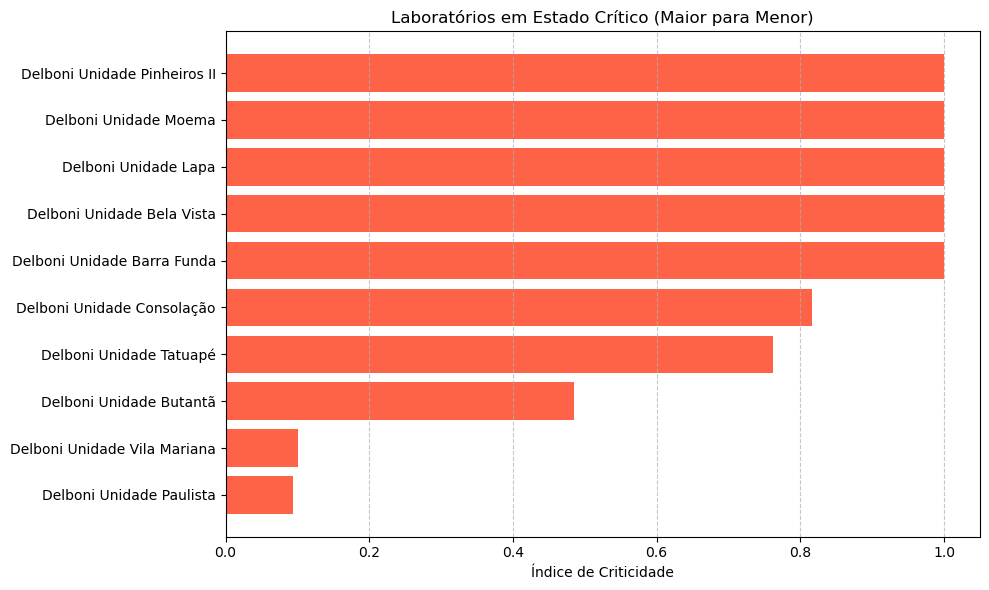

In [ ]:
from sprintUmContent.heap_functions import *

# obtém a lista ordenada da heap
ordenados = heap_labs_criticos(laboratorios, df_medias)

# plota o gráfico
visualizar_heap_criticos(ordenados)


## Vizualizações

Agora trabalheremos em vizualizar nossos dados, a primeira forma com grafos, criando um grafo juntando cada almoxarifado e seu devido laboratório para redistribuir,porém este tipo de vizualização não é o melhor para nossa aboradagem.

Criando algo melhor podemos utilizar a biblioteca folium para gerar um mapa bem mais detalhado e real das necessidades de cada laborátorio que será a nossa proxima seção.

C:\Users\labsfiap\AppData\Local\Temp\ipykernel_14972\4246363800.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


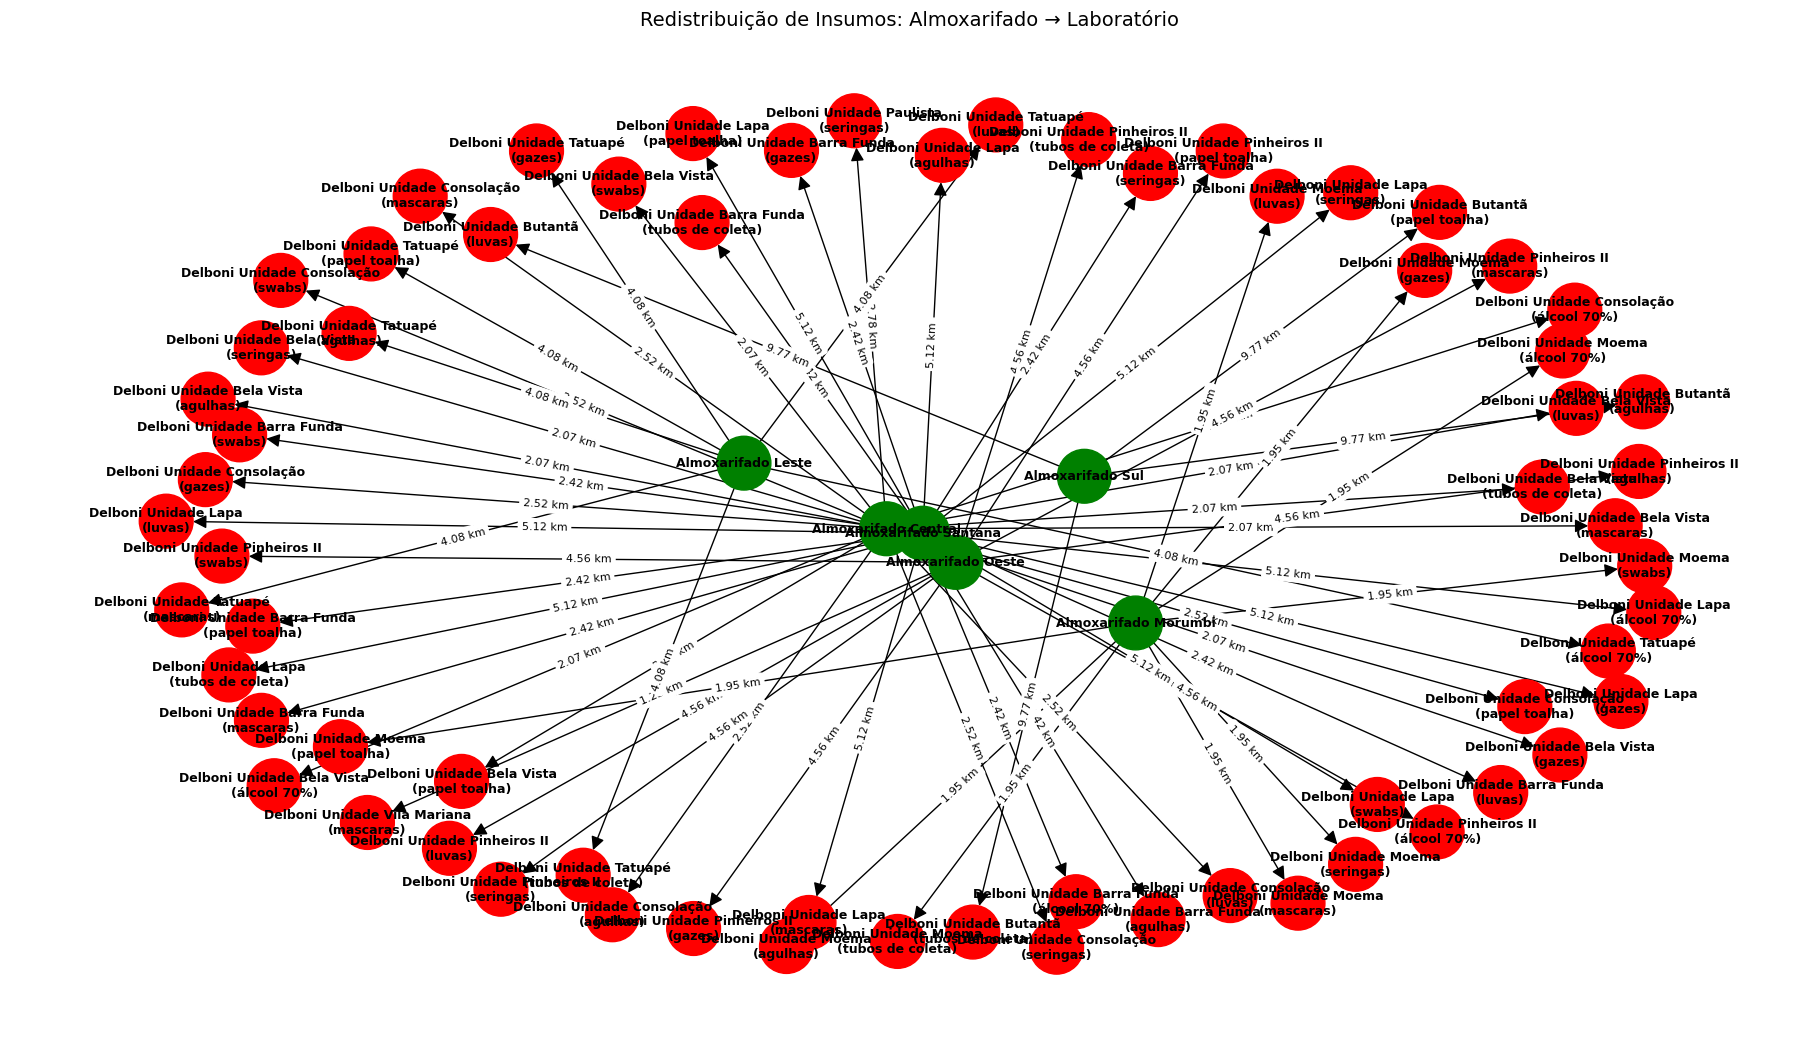

In [ ]:
from sprintUmContent import *
def plotar_grafo_redistribuicao(laboratorios, almoxarifados, df_media):
    """
    Cria e plota um grafo direcionado representando a redistribuição de insumos
    dos almoxarifados para os laboratórios com insumos em estado crítico.

    Cada nó vermelho representa um laboratório com um insumo crítico.
    Cada nó verde representa um almoxarifado com estoque disponível.
    As arestas indicam a rota de redistribuição, rotuladas com a distância em km.

    Args:
        laboratorios (dict): Dicionário com dados dos laboratórios.
        almoxarifados (dict): Dicionário com dados dos almoxarifados.
        df_media (pd.DataFrame): DataFrame contendo a média de insumos por laboratório.

    Returns:
        networkx.DiGraph: O grafo construído com os nós e arestas de redistribuição.
    """
    G = nx.DiGraph()  # Grafo direcionado

    criticos = labs_criticos(laboratorios, df_media)

    # Adiciona os nós e arestas do grafo
    for lab, insumo in criticos:
        retorno = encontrar_almoxarifado_mais_proximo(laboratorios, almoxarifados, lab, insumo)
        if isinstance(retorno, tuple):
            almox, dist, qtd = retorno

            # Nó do laboratório com insumo crítico (exibe o nome + insumo)
            lab_node = f"{lab}\n({insumo})"
            # Nó do almoxarifado
            almox_node = almox

            # Define a cor dos nós
            G.add_node(lab_node, color='red')
            G.add_node(almox_node, color='green')

            # Cria a aresta do almoxarifado para o laboratório, com peso da distância
            G.add_edge(almox_node, lab_node, weight=dist, label=f"{dist:.2f} km")

    # Tenta usar layout hierárquico (requer Graphviz)
    try:
        pos = graphviz_layout(G, prog='dot')  # layout top-down
    except:
        # Fallback para layout de força
        pos = nx.spring_layout(G, seed=42)

    # Rótulos das arestas
    edge_labels = nx.get_edge_attributes(G, 'label')
    # Cores dos nós
    node_colors = [G.nodes[n].get('color', 'blue') for n in G.nodes]

    # Plotagem do grafo
    plt.figure(figsize=(18, 10))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500,
            arrows=True, arrowsize=20, font_size=9, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Redistribuição de Insumos: Almoxarifado → Laboratório", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return G
G = plotar_grafo_redistribuicao(laboratorios, almoxarifados, df_medias)

# Renderização do MAPA

Agora poderemos vizualizar melhor nossas informações com uma camada dedicada aos laboratórios em estado crítico que pode ser selecionada no canto superior direito do mapa, Assim concluindo nosso projeto de maneira que sempre esteja disponível para a vizualização de qualquer um a situação de cada almoxarifado e cada laboratório.

In [ ]:
import networkx as nx
import folium
import branca
def renderizar_mapa_labs(laboratorios: dict, almoxarifados:dict, df_labs_criticos, laboratorio_central="Delboni Unidade Paulista", zoom=12):
    """
    Renderiza um mapa interativo com a localização dos laboratórios e almoxarifados,
    destacando os laboratórios com insumos em estado crítico e suas rotas de reabastecimento.

    Args:
        laboratorios (dict): Dicionário com os laboratórios, coordenadas e insumos.
        almoxarifados (dict): Dicionário com os almoxarifados, coordenadas e estoques.
        df_labs_criticos (pd.DataFrame): DataFrame com laboratórios e insumos críticos + almoxarifado de reabastecimento.
        laboratorio_central (str, opcional): Nome do laboratório para centralizar o mapa. Padrão é "Delboni Unidade Paulista".
        zoom (int, opcional): Nível inicial de zoom do mapa. Padrão é 12.

    Returns:
        folium.Map: Objeto de mapa interativo com marcadores e conexões.
    """

    # Inicializa o mapa centralizado no laboratório principal
    mapa = folium.Map(
        location=[
            laboratorios[laboratorio_central]["coordenadas"]["latitude"],
            laboratorios[laboratorio_central]["coordenadas"]["longitude"]
        ],
        zoom_start=zoom,
        control_scale=True
    )

    # Camadas
    folium.TileLayer("OpenStreetMap", overlay=False).add_to(mapa)
    labs_layer = folium.FeatureGroup(name="Laboratórios").add_to(mapa)
    criticos_layer = folium.FeatureGroup(name="Laboratórios críticos", show=False).add_to(mapa)
    folium.LayerControl().add_to(mapa)

    # Laboratórios (azul)
    for nome, lab in laboratorios.items():
        lat = lab["coordenadas"]["latitude"]
        lon = lab["coordenadas"]["longitude"]

        itens_html = ''.join([
            f'<li>Nome: {insumo} — Quantidade: {quantidade}</li>'
            for insumo, quantidade in lab['insumos'].items()
        ])

        html = f"""
        <div style="font-family: Arial, sans-serif; padding: 10px; border-radius: 10px;">
            <h4 style="margin-bottom: 5px; color: #2c3e50;">{nome}</h4>
            <p style="margin: 5px 0; font-weight: bold; color: #34495e;">
                Total de Tipos de Insumo: {len(lab['insumos'])}
            </p>
            <ul style="padding-left: 20px; margin: 0;">
                {itens_html}
            </ul>
        </div>
        """
        popup = folium.Popup(branca.element.IFrame(html=html, width=400, height=150), max_width=600)
        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(icon='flask', prefix='fa', color='blue'),
            popup=popup
        ).add_to(labs_layer)

    # Almoxarifados (verde)
    for nome, almox in almoxarifados.items():
        lat = almox["coordenadas"]["latitude"]
        lon = almox["coordenadas"]["longitude"]
        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(icon='cube', prefix='fa', color='green'),
            popup=nome
        ).add_to(labs_layer)

    # Laboratórios críticos (vermelho) e conexões
    for _, row in df_labs_criticos.iterrows():
        lab_nome = row["Laboratório"]
        almox_nome = row["Nome almoxarifado"]
        insumo_critico = row["Insumo"]
        distancia = row["Distancia"]

        lat_lab = laboratorios[lab_nome]["coordenadas"]["latitude"]
        lon_lab = laboratorios[lab_nome]["coordenadas"]["longitude"]

        lat_almox = almoxarifados[almox_nome]["coordenadas"]["latitude"]
        lon_almox = almoxarifados[almox_nome]["coordenadas"]["longitude"]

        # Almoxarifado também aparece na camada crítica
        folium.Marker(
            location=[lat_almox, lon_almox],
            icon=folium.Icon(icon='cube', prefix='fa', color='darkgreen'),
            popup=folium.Popup(f"Almoxarifado: {almox_nome}", max_width=300)
        ).add_to(criticos_layer)

        # Laboratório crítico
        html = f"""
        <div style="
            font-family: Arial, sans-serif;
            padding: 12px;
            border: 2px solid #e74c3c;
            border-radius: 12px;
            background-color: #fff5f5;
            box-shadow: 0 2px 6px rgba(0,0,0,0.1);
        ">
            <h4 style="margin-bottom: 6px; color: #c0392b;">⚠️ {lab_nome}</h4>
            <p style="margin: 5px 0; font-weight: bold; color: #e74c3c;">
                Insumo crítico: {insumo_critico}
            </p>
            <p style="margin: 5px 0; font-size: 13px; color: #7f8c8d;">
                Reposição mais próxima: {almox_nome}
            </p>
        </div>
        """
        popup = folium.Popup(branca.element.IFrame(html=html, width=350, height=160), max_width=450)
        folium.Marker(
            location=[lat_lab, lon_lab],
            icon=folium.Icon(icon='exclamation-triangle', prefix='fa', color='red'),
            popup=popup
        ).add_to(criticos_layer)

        # Conexão com linha
        folium.PolyLine(
            locations=[[lat_lab, lon_lab], [lat_almox, lon_almox]],
            color='red',
            weight=3,
            opacity=0.9,
            tooltip=f"Distância: {distancia}"
        ).add_to(criticos_layer)

    return mapa

mapa = renderizar_mapa_labs(laboratorios, almoxarifados, df_labs)
mapa  # para exibir direto no Jupyter ou notebook